# Stack Overflow Annual Developer Survery

In [136]:
# Importing models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

pd.set_option('display.max_columns', None)


In [137]:
# Reading data from a csv filr
df = pd.read_csv('/home/ekirush/Documents/MyPortfolio/stack-overflow-developer-survey-2023/survey_results_public.csv',index_col='ResponseId')

# Displaying the first 5 rows of the dataset
df.head()

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,For

In [138]:
# checking columns in the dataset
df.columns

Index(['Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkWith', 

In [139]:
# Filtering columns to work with.

data = df[['Age','Employment','RemoteWork','EdLevel','YearsCode','Industry','ConvertedCompYearly']]

data.head()

,Age,Employment,RemoteWork,EdLevel,YearsCode,Industry,ConvertedCompYearly
ResponseId,,,,,,,
1,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN
2,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,"Information Services, IT, Software Development...",285000.0
3,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,"Information Services, IT, Software Development...",250000.0
4,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,NaN,156000.0
5,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Other,23456.0


## Exploratory Data Analysis (EDA)

In [140]:
# Checking data shape
data.shape

(89184, 7)

In [141]:
# Data types of the columns
data.dtypes

Age                     object
Employment              object
RemoteWork              object
EdLevel                 object
YearsCode               object
Industry                object
ConvertedCompYearly    float64
dtype: object

In [142]:
# Checking duplicates and dropping them
print(f'Total duplicated rows: {data.duplicated().sum()}\n\n')
data = data.drop_duplicates()

Total duplicated rows: 28529




In [143]:
# Checking null values
print(f'Total null values per column:\n{data.isna().sum()}')

Total null values per column:
Age                        0
Employment                72
RemoteWork              2707
EdLevel                    8
YearsCode                358
Industry               28205
ConvertedCompYearly    14518
dtype: int64


In [144]:
# Investigating each column
sorted(data.Age.unique())

['18-24 years old',
 '25-34 years old',
 '35-44 years old',
 '45-54 years old',
 '55-64 years old',
 '65 years or older',
 'Prefer not to say',
 'Under 18 years old']

In [145]:
# Remove unwanted characters
data.Age = data.Age.str.replace(' years old','').str.replace('Prefer not to say','N/A').str.replace(' years or older','+').str.replace('Under 18','1-17').str.strip()
sorted(data.Age.unique())

['1-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'N/A']

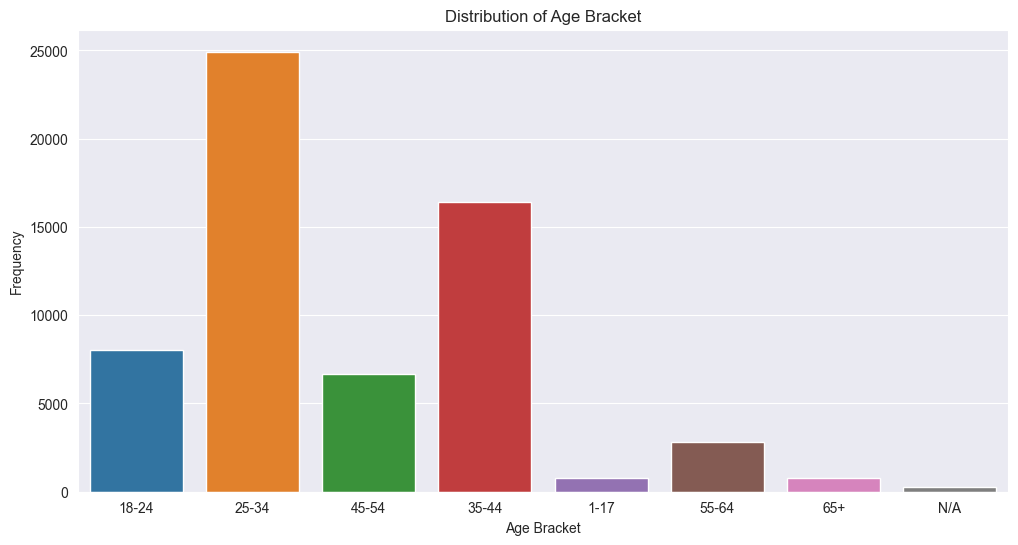

In [146]:
plt.figure(figsize=(12,6))
sns.set_style(style='darkgrid')
sns.countplot(data=data,x = 'Age',hue='Age',legend=False)
plt.title('Distribution of Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Frequency')
plt.show()

In [147]:
# Explore Employment Column
data.Employment.unique()

array([nan, 'Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Student, full-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time;Student, part-time',
       'Not employed, but looking for work;Student, full-time',
       'Employed, part-time;Student, part-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time', 'I prefer not to say',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Student, part-time',
       'Not employed, but looking for work;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Retired', 'Employed, full-time;Student, full-time',
       'Student, full-time;Student, part-time',
       '

In [148]:
data.Employment.dtype

dtype('O')

In [149]:
data.Employment = data.Employment.fillna('N/A')

In [150]:
def employment(values):
    if isinstance(values,str):
        
        if'Employed' in values:
            return 'Employed'
        elif 'Not employed' in values:
            return 'Not Employed'
        elif 'self-employed' or 'Independent contractor' in values:
            return 'Freelancer'
        elif 'Student' in values:
            return 'Student'
        elif 'Retired' in values:
            return 'Retired'
        elif 'i prefer not to say' or 'n/a' in values:
            return 'N/A'
        return values
    return values

data.Employment = data.Employment.apply(employment)
data.Employment.unique()

array(['Freelancer', 'Employed', 'Not Employed'], dtype=object)

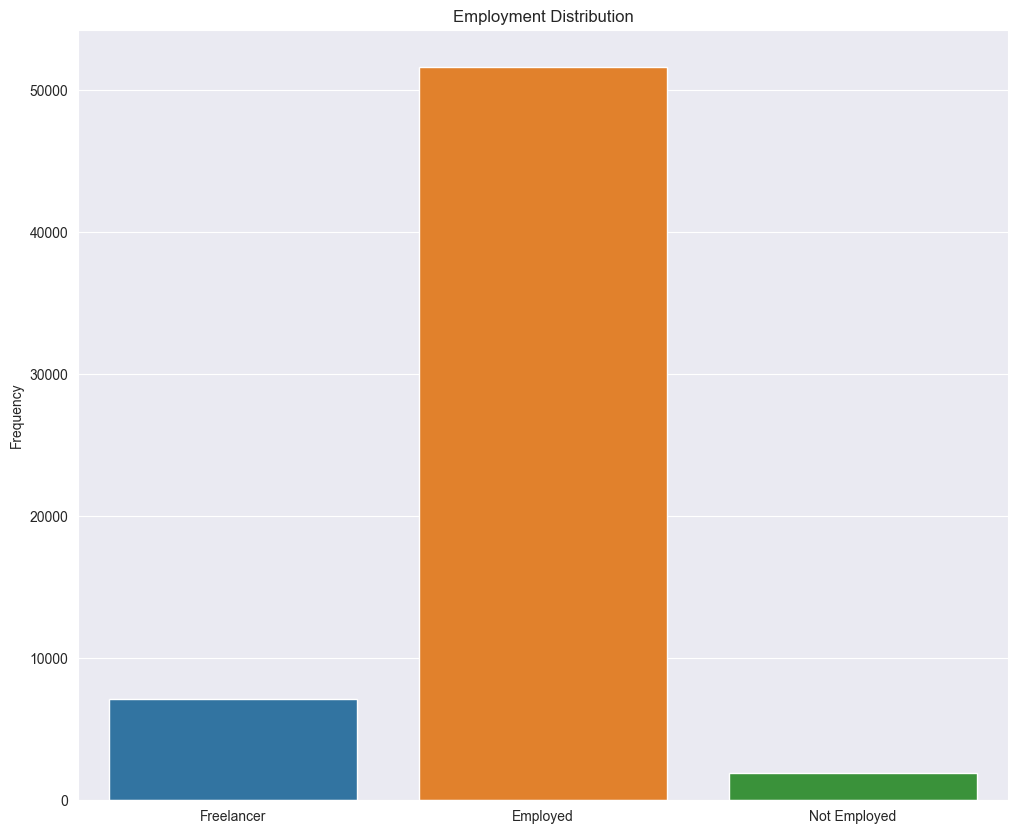

In [151]:
plt.figure(figsize=(12,10))
sns.set_style(style='darkgrid')
sns.countplot(data=data,x = 'Employment',hue='Employment',legend=False)
plt.title('Employment Distribution')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

In [152]:
# Exploring RemoteWork Column
data.RemoteWork.unique()

array([nan, 'Remote', 'Hybrid (some remote, some in-person)', 'In-person'],
      dtype=object)

In [153]:
data.RemoteWork = data.RemoteWork.str.replace('Hybrid (some remote, some in-person)','Hybrid').str.strip()
data.RemoteWork = data.RemoteWork.fillna(str('N/A'))
data.RemoteWork.unique()

array(['N/A', 'Remote', 'Hybrid', 'In-person'], dtype=object)

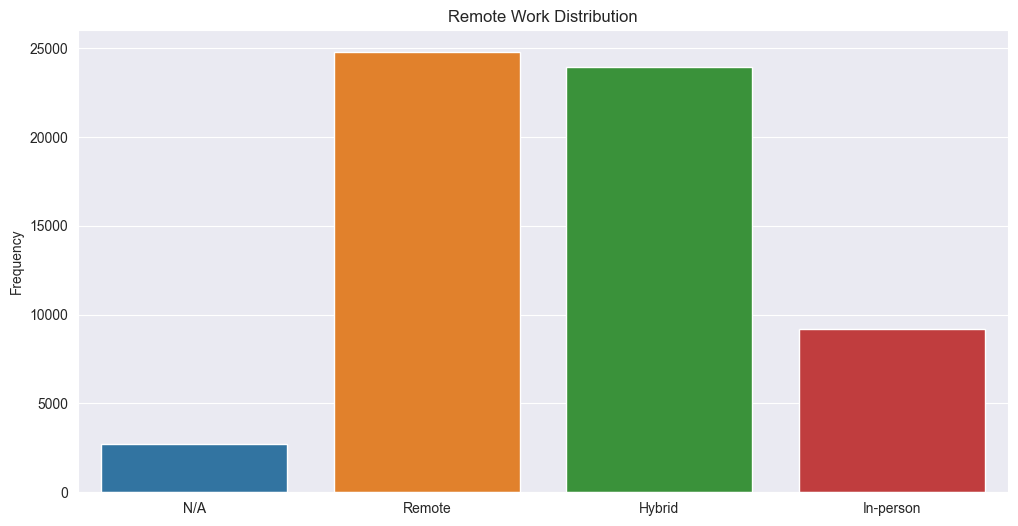

In [154]:
plt.figure(figsize=(12,6))
sns.set_style(style='darkgrid')
sns.countplot(data=data,x = 'RemoteWork',hue='RemoteWork',legend=False)
plt.title('Remote Work Distribution')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

In [155]:
# Education Level Columns
data.EdLevel.unique()

array([nan, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [156]:
def education_level(values):
    if isinstance (values,str):
        if 'bachelor’s degree' in values.lower():
            return 'Bachelor’s Degree'
        elif 'master’s degree' in values.lower():
            return 'Master’s Degree'
        elif 'primary/elementary school' in values.lower():
            return 'Elementary School'
        elif 'professional degree' in values.lower():
            return 'Professional Degree'
        elif 'associate degree' in values.lower():
            return 'Associate Degree'
        elif 'secondary school' in values.lower():
            return 'Secondary School'
        elif 'some college/university study without earning a degree' in values.lower():
            return 'Not Graduated'
        elif 'something else' in values.lower():
            return 'N/A'
        return values
    return values


data.EdLevel = data.EdLevel.apply(education_level) 

data.EdLevel = data.EdLevel.fillna(str('N/A'))

data.EdLevel.unique() 
    

array(['N/A', 'Bachelor’s Degree', 'Not Graduated', 'Master’s Degree',
       'Elementary School', 'Professional Degree', 'Associate Degree',
       'Secondary School'], dtype=object)

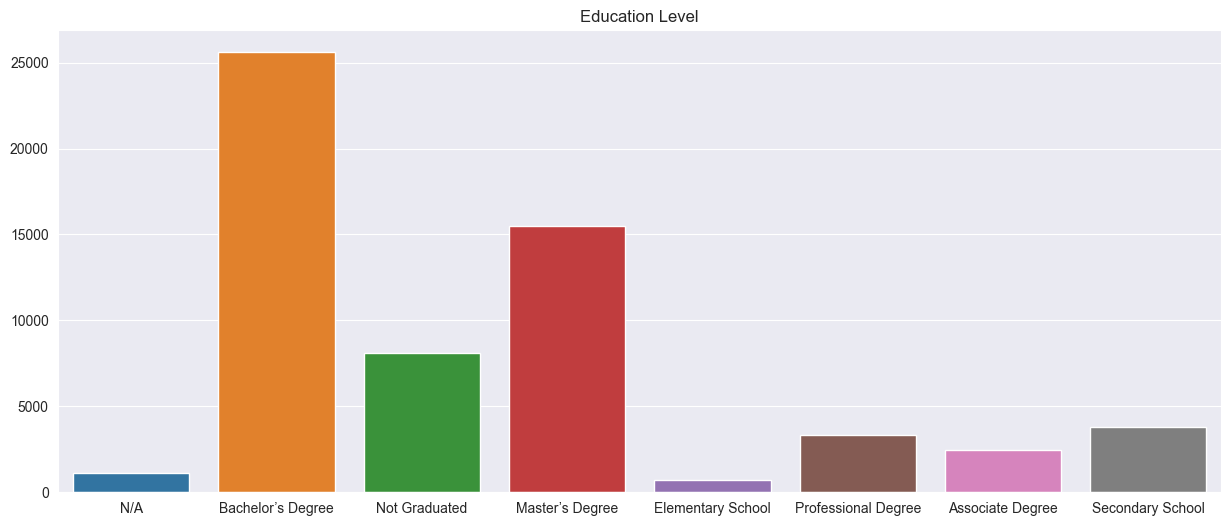

In [157]:
plt.figure(figsize=(15,6))
sns.set_style(style='darkgrid')
sns.countplot(data=data,x = 'EdLevel',hue='EdLevel',legend=False)
plt.title('Education Level')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [158]:
# Examining years of coding Column
print(data.YearsCode.dtype)

data.YearsCode.unique()

object


array([nan, '18', '27', '12', '6', '21', '4', '5', '20', '14', '10', '15',
       '11', '3', '24', '8', '13', 'Less than 1 year', '16', '33', '22',
       '30', '32', '7', '35', '28', '40', '17', '29', '19',
       'More than 50 years', '9', '38', '26', '34', '25', '2', '45', '23',
       '31', '43', '1', '48', '41', '50', '39', '42', '37', '36', '44',
       '46', '49', '47'], dtype=object)

In [159]:
data.YearsCode = data.YearsCode.fillna(str('N/A'))

data.YearsCode = data.YearsCode.replace('More than 50 years','50+').str.strip()
data.YearsCode.unique()

array(['N/A', '18', '27', '12', '6', '21', '4', '5', '20', '14', '10',
       '15', '11', '3', '24', '8', '13', 'Less than 1 year', '16', '33',
       '22', '30', '32', '7', '35', '28', '40', '17', '29', '19', '50+',
       '9', '38', '26', '34', '25', '2', '45', '23', '31', '43', '1',
       '48', '41', '50', '39', '42', '37', '36', '44', '46', '49', '47'],
      dtype=object)

In [160]:
def convert_age(age):
    if age == 'N/A':
        return np.nan
    elif age == 'Less than 1 year':
        return 0
    elif age == '50+':
        return 51
    else:
        return int(age)


data['AgeNumeric'] = data.YearsCode.apply(convert_age)

# Step 4: Define the bins
bins = [-1, 0, 12, 18, 35, 50, 100]
labels = ['0', '1-12', '13-18', '19-35', '36-50', '51+']

# Step 5: Use pd.cut() to categorize the ages
data['YearsCodeBracket'] = pd.cut(data['AgeNumeric'], bins=bins, labels=labels, right=True)
data['YearsCodeBracket'] = data['YearsCodeBracket'].cat.add_categories(['N/A'])
data['YearsCodeBracket'] = data['YearsCodeBracket'].fillna('N/A')

data['YearsCodeBracket'].unique()

['N/A', '13-18', '19-35', '1-12', '0', '36-50', '51+']
Categories (7, object): ['0' < '1-12' < '13-18' < '19-35' < '36-50' < '51+' < 'N/A']

In [161]:
data.columns

Index(['Age', 'Employment', 'RemoteWork', 'EdLevel', 'YearsCode', 'Industry',
       'ConvertedCompYearly', 'AgeNumeric', 'YearsCodeBracket'],
      dtype='object')

In [162]:
data = data.drop(['YearsCode','AgeNumeric'], axis=1)
data.columns

Index(['Age', 'Employment', 'RemoteWork', 'EdLevel', 'Industry',
       'ConvertedCompYearly', 'YearsCodeBracket'],
      dtype='object')

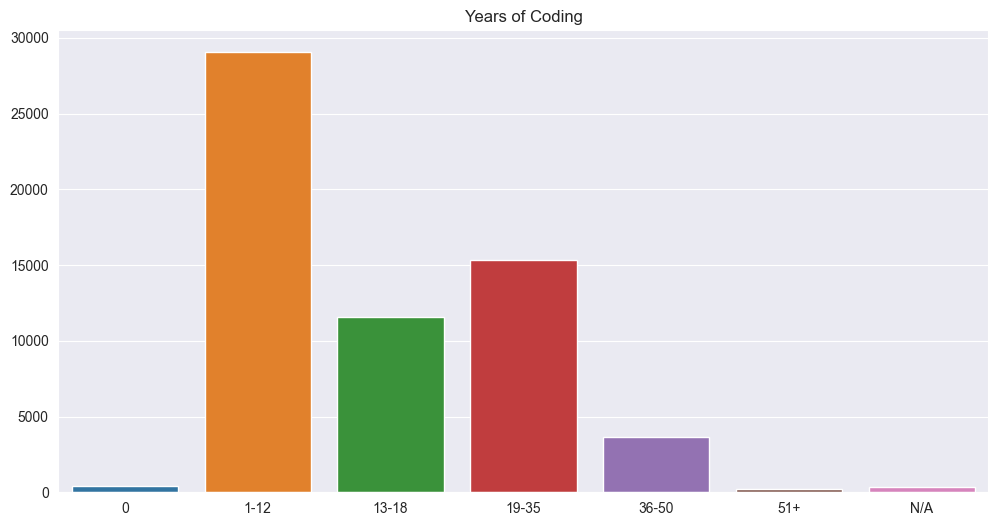

In [163]:
plt.figure(figsize=(12,6))
sns.set_style(style='darkgrid')
sns.countplot(data=data,x = 'YearsCodeBracket',hue=data['YearsCodeBracket'],legend=False)
plt.title('Years of Coding')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [164]:
# Industry Column

data.Industry.unique()

array([nan,
       'Information Services, IT, Software Development, or other Technology',
       'Other', 'Financial Services',
       'Manufacturing, Transportation, or Supply Chain',
       'Retail and Consumer Services', 'Higher Education',
       'Legal Services', 'Insurance', 'Healthcare', 'Oil & Gas',
       'Wholesale', 'Advertising Services'], dtype=object)

In [165]:
def industry(values):
    if isinstance(values,str):
        if 'Information Services, IT, Software Development, or other Technology' in values:
            return 'IT'
        elif 'Manufacturing, Transportation, or Supply Chain' in values:
            return 'Manufacturing'
        elif 'Retail and Consumer Services' in values:
            return 'Retail'
        elif 'Financial Services' in values:
            return 'Finance'
        elif 'Advertising Services' in values:
            return 'Adverts'
        elif 'Legal Services' in values:
            return 'Legal'
        elif 'Higher Education' in values:
            return 'Education'
        return values
    return values

data.Industry = data.Industry.apply(industry)
data.Industry = data.Industry.fillna(str('Other'))

In [166]:
data.Industry.unique()

array(['Other', 'IT', 'Finance', 'Manufacturing', 'Retail', 'Education',
       'Legal', 'Insurance', 'Healthcare', 'Oil & Gas', 'Wholesale',
       'Adverts'], dtype=object)

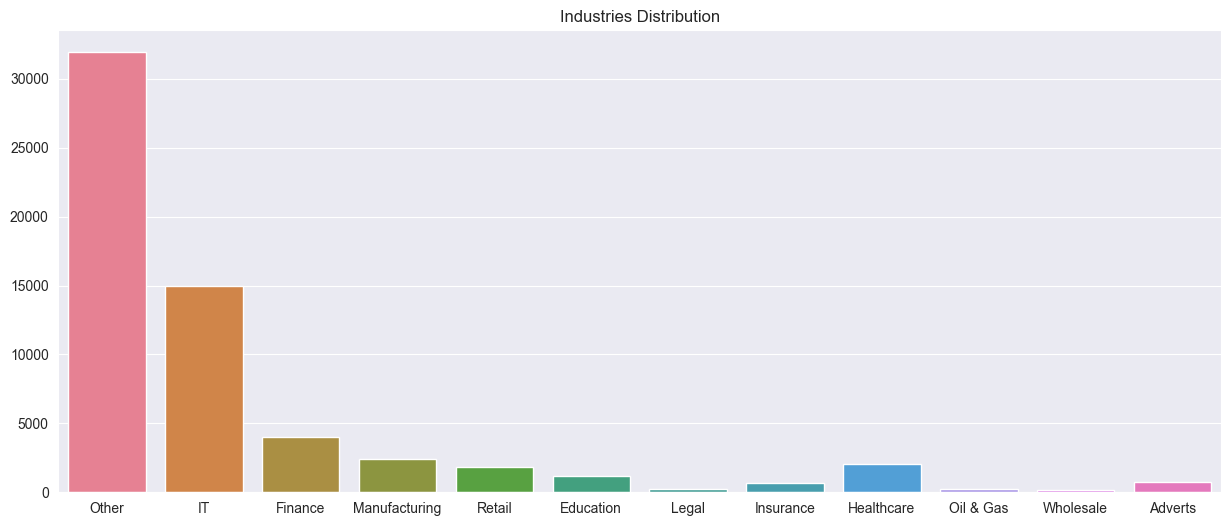

In [167]:
plt.figure(figsize=(15,6))
sns.set_style(style='darkgrid')
sns.countplot(data=data,x = 'Industry',hue='Industry',legend=False,)
plt.title('Industries Distribution')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [168]:
# ConvertedCompYearly column

data.ConvertedCompYearly.unique()

array([    nan, 285000., 250000., ...,   1606., 319711.,  16917.])

In [169]:
data.ConvertedCompYearly = data.ConvertedCompYearly.fillna(data.ConvertedCompYearly.min())

data.ConvertedCompYearly.unique()

array([1.00000e+00, 2.85000e+05, 2.50000e+05, ..., 1.60600e+03,
       3.19711e+05, 1.69170e+04])

In [170]:
data.ConvertedCompYearly = round(data.ConvertedCompYearly)
data.ConvertedCompYearly.unique()

array([1.00000e+00, 2.85000e+05, 2.50000e+05, ..., 1.60600e+03,
       3.19711e+05, 1.69170e+04])

In [171]:
print(f'Duplicated rows: {data.duplicated().sum()}')

data = data.drop_duplicates()

Duplicated rows: 18567


## Analysis

### What companies do developers get paid the most?

In [172]:
data.columns

Index(['Age', 'Employment', 'RemoteWork', 'EdLevel', 'Industry',
       'ConvertedCompYearly', 'YearsCodeBracket'],
      dtype='object')

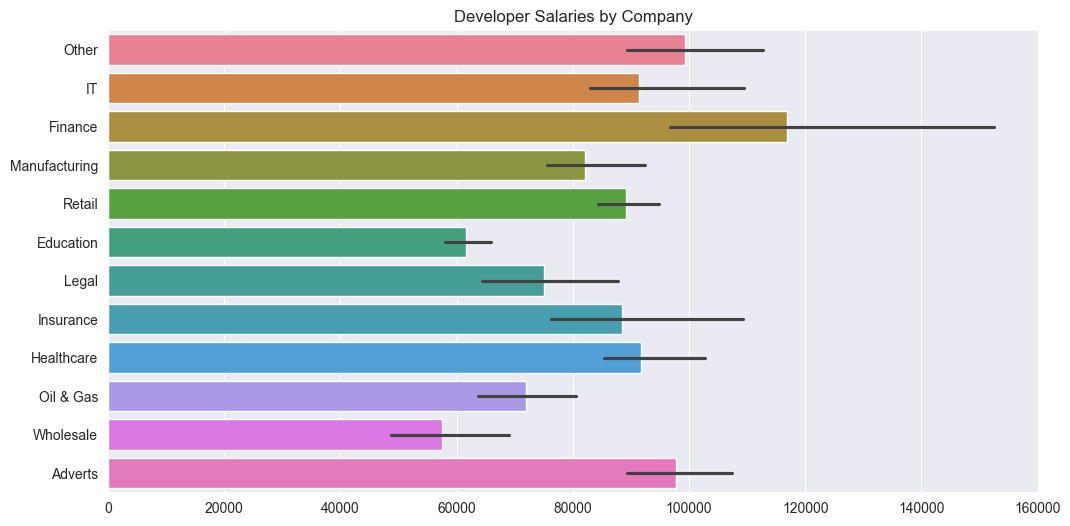

In [173]:
plt.figure(figsize=(12,6))
sns.set_style(style='darkgrid')
sns.barplot(data = data, x = data['ConvertedCompYearly'], y = data['Industry'],hue = data['Industry'])
plt.title('Developer Salaries by Company')
plt.xlabel('')
plt.ylabel('')
plt.show()

### How much does remote working matters to employee

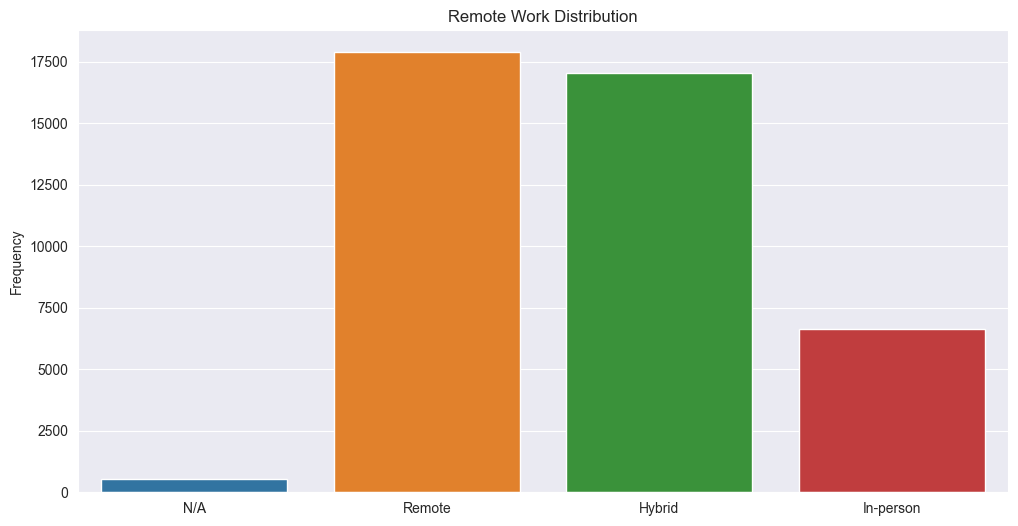

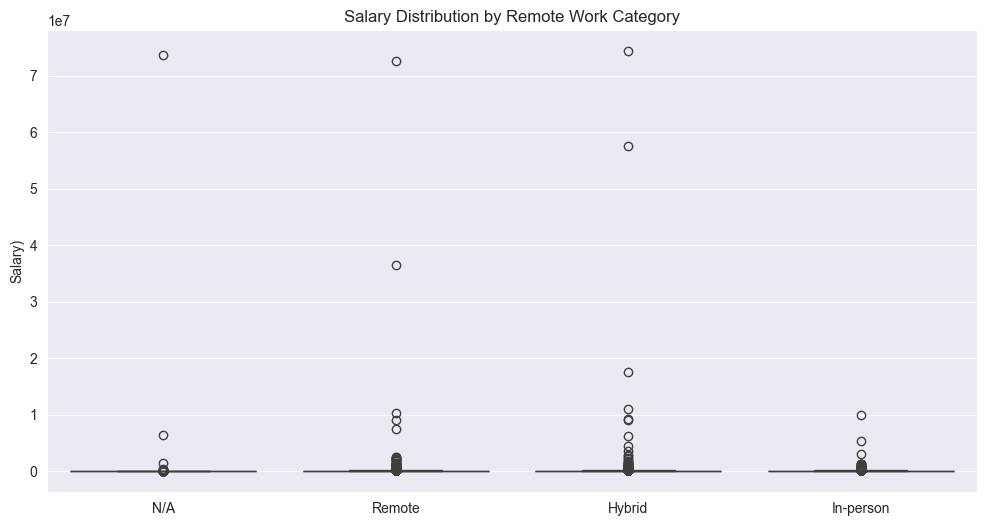

In [174]:
# Bar Plot for Remote Work Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='RemoteWork',hue='RemoteWork')
plt.title('Remote Work Distribution')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

# Box Plot for Salary Distribution by Remote Work
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='RemoteWork', y='ConvertedCompYearly')
plt.title('Salary Distribution by Remote Work Category')
plt.xlabel('')
plt.ylabel('Salary)')
plt.show()


### How does coding experience affect the level of pay?

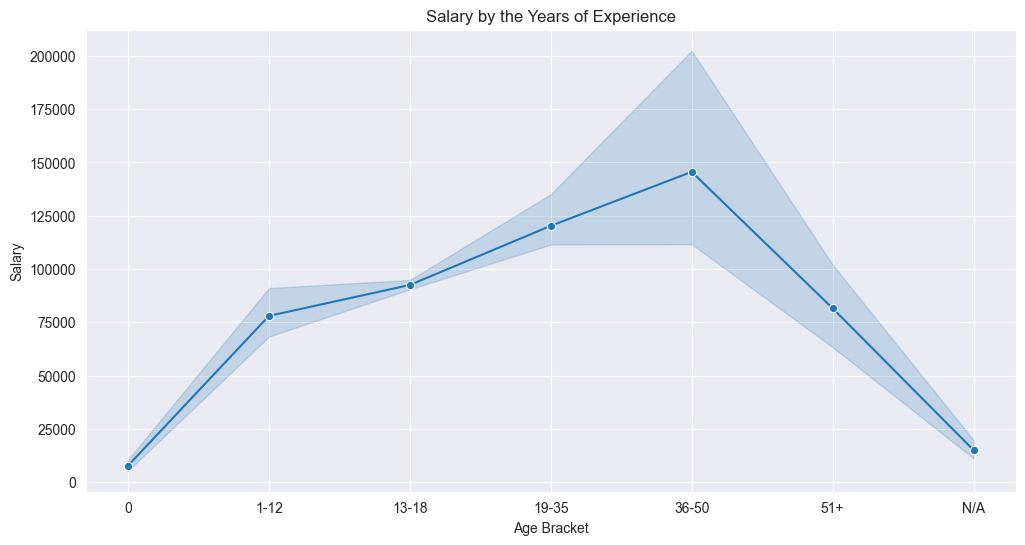

In [175]:
plt.figure(figsize=(12,6))
sns.set_style(style='darkgrid')
sns.lineplot(data = data, x = data['YearsCodeBracket'], y = data['ConvertedCompYearly'],marker='o')
plt.title('Salary by the Years of Experience')
plt.xlabel('Age Bracket')
plt.ylabel('Salary')
plt.show()

### Are you likely to get a job as a developer if you have a masters' degree?

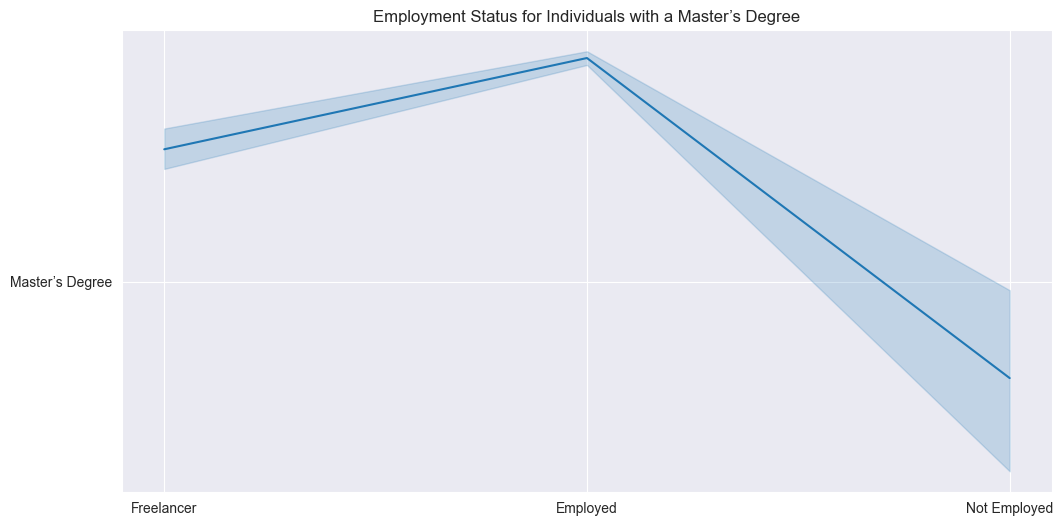

In [176]:

plt.figure(figsize=(12, 6))
sns.set_style(style='darkgrid')
sns.lineplot(data = data,x='Employment',y='EdLevel')
plt.title('Employment Status for Individuals with a Master’s Degree')
plt.xlabel('')
plt.ylabel('')
plt.show()